### Homework 2 - Part 2 - Task 2: GMM and PCA
Gaussian Mixture Model(GMM) and PCA <br>
We will use face image dataset to build GMM model to generate new face images <br>
GMM is very slow for high dimentional data <br>
To speed-up GMM, we will apply PCA to the input images. <br>
image samples -> forward PCA -> samples in lower-dimensional space -> GMM <br>
GMM->random sampling -> new samples in lower-dimensional space -> inverse PCA -> new images <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn <br>
see GMM_DE_Generative_Model.ipynb

In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

Load image data

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=500)
print(faces.target_names)
print(faces.images.shape) # 530 data (not 530 kind of ppl)


['George W Bush']
(530, 62, 47)


check the total number of samples/images, `N`

In [4]:
#what is N ?
N=faces.images.shape[0]
N

530

check the input dimension (the number of elements in each input sample), `M`

In [5]:
#what is M?
M=faces.images.shape[1]*faces.images.shape[2]
M # number of pixels

2914

Next let's plot the first 100 of these to recall exactly what we're looking at:

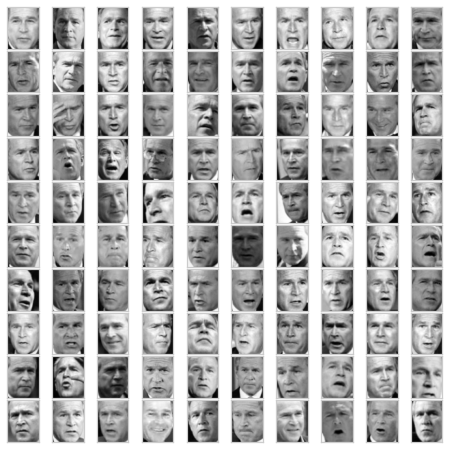

In [6]:
def plot_faces(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i], cmap='gray')
plot_faces(faces.images)

We have N images, and each image has M pixels <br>
N = 530  <  M = 2914 <br>
the number of samples is smaller than the dimension <br>
We will use dimension reduction to reduce the number of features

In [9]:
# apply PCA to images
# you may need this: images.reshape(N,-1)
# set PCA paramter n_components to 120
# set whiten=True to use the normalized features
# assume data = pca.fit_transform(...)

In [11]:
#check the shape of data
data = faces.images.reshape(530, -1)

from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components = 120, whiten = True)
data = pca.fit_transform(data)
data.shape

(530, 120)

In [60]:
#check the value of explained variance
print(pca.explained_variance_)

[927126.94   595863.2    309618.94   249800.38   204612.64   120080.516
  99890.74    83485.72    82168.86    76670.516   65033.707   60773.453
  49680.316   46878.305   44316.418   41499.645   38898.29    37164.688
  34529.66    32340.465   29364.4     27817.9     25286.455   22933.37
  22613.514   22183.729   21859.236   20434.455   19614.805   17724.941
  17087.209   16170.802   15033.146   14814.257   14587.727   14173.02
  13368.399   13120.167   12605.395   12397.477   11944.286   11718.608
  11457.203   11183.962   10662.905   10350.726   10042.934    9926.379
   9681.703    9500.661    9436.688    9141.557    9066.85     8609.681
   8482.132    8126.814    8080.7627   7960.4062   7644.315    7555.6377
   7313.4863   7196.7124   7029.5337   6931.3374   6728.9565   6575.2964
   6364.4443   6251.121    6145.3257   6019.1885   6017.2573   5843.9487
   5722.439    5546.4717   5501.366    5471.064    5358.971    5323.235
   5176.617    5101.985    5065.6274   4936.832    4802.6294   

Afer PCA transform, the number of features is changed from 2914 (62*47) to 120 <br>
N = 530,  data.shape[1] = 120 <br>
Now, we fit many GMM to `data` with different number of components <br>
We will select the best one based on AIC

C:\Users\jp040\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


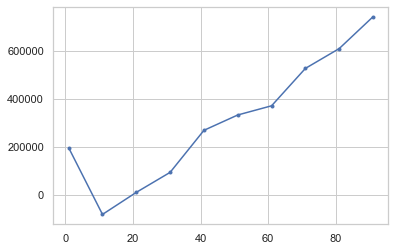

In [18]:
#fit GMM with n_components in the range of 1 to 100 with step 10
n_components = np.arange(1, 100, 10) # 1 11 21 31 .. 91

models = [GMM(n).fit(data)
            for n in n_components]
            
plt.plot(n_components, [m.aic(data) for m in models], '.-', label='AIC')


Overall, the curve keeps going up: something is weird. <br>
What will the curve be if we have more data to train GMM ? <br>
note: you may get a different curve due to some randomness in initialization.

It looks like when n_components=10, AIC reaches the minimum. <br>
Let's fit the GMM with n_components=10, and check if gmm is converged or not 

In [27]:
# you code to fit GMM
#
#---------
gmm = GMM(n_components=10).fit(data)
print(gmm.converged_)

True


Draw 100 new samples from the gmm <br>
The new data samples are in the 120-dimensional projected space

In [28]:
#your code to generate data_new from gmm
data_new, _ = gmm.sample(100)
#then check the shape
data_new.shape

(100, 120)

Finally, we can transform the 100 samples back to the original space (pca inverse) <br>
and plot some of the images in the original space <br>

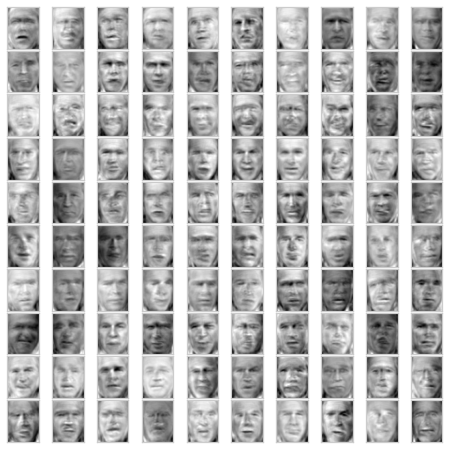

In [29]:
# your code to obtain faces_new by apply inverse pca on data_new
faces_new = pca.inverse_transform(data_new)
# show the new images
plot_faces(faces_new.reshape(-1,62, 47))

### Let's repeat the above process using more data

In [30]:
#do not change the code in this cell
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


In [31]:
#check the number of images
N

530

In [32]:
#check the input dimension (the number of elements in each input sample)
M

2914

We have N images, and each iamge has M pixels  <br>
N = 1560 and M = 2914 : N < M  <br>
We will use dimension reduction to reduce the number of features from 2914 to 120 <br>

In [33]:
# apply PCA to images
# set PCA parameter n_components to 120
# assume data = pca.fit_transform(...)
pca = PCA(n_components=120, whiten = True)
data = pca.fit_transform(faces.images.reshape(1560, -1))

In [34]:
#check the shape of data
data.shape # 1560, 120

(1560, 120)

In [62]:
#check the value of explained variance
print(pca.explained_variance_ratio_)

[0.21341546 0.13716182 0.07127123 0.05750158 0.04709981 0.02764135
 0.02299386 0.01921759 0.01891446 0.0176488  0.01497012 0.01398945
 0.01143592 0.01079092 0.0102012  0.00955281 0.008954   0.00855494
 0.00794839 0.00744446 0.00675939 0.00640341 0.00582069 0.00527904
 0.00520541 0.00510648 0.00503178 0.00470381 0.00451513 0.00408011
 0.00393331 0.00372236 0.00346048 0.0034101  0.00335795 0.00326249
 0.00307727 0.00302013 0.00290164 0.00285378 0.00274946 0.00269751
 0.00263734 0.00257444 0.0024545  0.00238263 0.00231178 0.00228495
 0.00222863 0.00218696 0.00217223 0.0021043  0.0020871  0.00198186
 0.0019525  0.00187071 0.00186011 0.00183241 0.00175965 0.00173923
 0.00168349 0.00165661 0.00161813 0.00159553 0.00154894 0.00151357
 0.00146503 0.00143895 0.00141459 0.00138556 0.00138511 0.00134522
 0.00131725 0.00127674 0.00126636 0.00125938 0.00123358 0.00122536
 0.00119161 0.00117443 0.00116606 0.00113641 0.00110552 0.00108964
 0.00107252 0.00104872 0.00104284 0.00102504 0.00100226 0.0009

Now, we fit many GMMs to the transformed `data` with different number of components   <br>
We will select the best one based on AIC

C:\Users\jp040\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


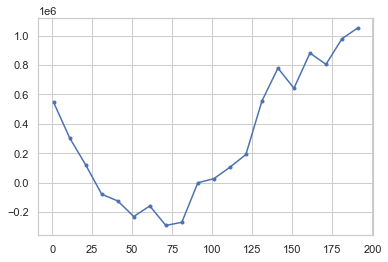

In [36]:
#fit GMM with n_components in the range of 1 to 200 with the step of 10
n_components = np.arange(1, 200, 10)

models = [GMM(n, covariance_type='full').fit(data) for n in n_components]
plt.plot(n_components, [m.aic(data) for m in models], '.-', label='AIC')

Now, we have a U-haped curve, nice. (again, you may get a different curve) <br>
It appears that AIC is miminized around 60 components. <br>
What is the exact value of n_components when AIC is minimum?

In [52]:
#find out the exact value of n_components when AIC is at its minimum
#you may get a different number due to some randomness in GMM
minimum = np.min([m.aic(data) for m in models])


numpy.float64

In [53]:
for i in range(20):
    if models[i].aic(data) == minimum:
        print(n_components[i])


71


Let's quickly fit GMM with n_components=61 (or other number in your file) to the `data` and confirm that it has converged:

In [54]:
# fit the GMM
gmm = GMM(n_components=71, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)


True


Generate 100 new samples from this GMM

In [55]:
#your code to generate data_new from gmm
data_new, _ = gmm.sample(100)
#then check the shape
data_new.shape

(100, 120)

Transform the 100 new samples back to the original space

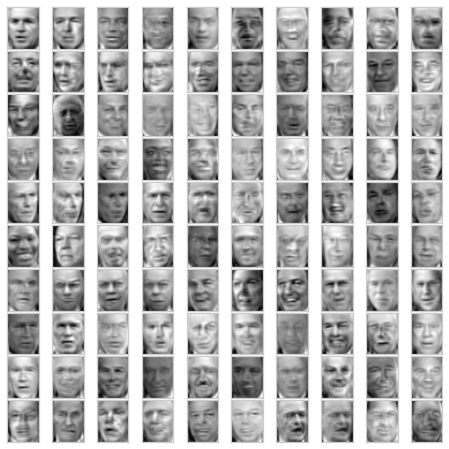

In [56]:
# your code to obtain faces_new by apply inverse pca on data_new
faces_new = pca.inverse_transform(data_new)
# show the new images
plot_faces(faces_new.reshape(-1,62, 47))

GMM is good but very time consuming. PCA+GMM is a good approach to reduce time cost.